In [ ]:
%autosave 10

**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt #plotting package
import seaborn as sns
#Next line helps with rendering plots
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400 
mpl.rcParams["font.size"]=4

In [5]:
df = pd.read_excel(r'C:\Users\uppal\Desktop\Technocolabs internship\default_of_credit_card_clients.xls')

df=pd.read_csv('cleaned_data.csv')
print(df.head)


<bound method NDFrame.head of                   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  \
0      798fc410-45c1      20000    2          2         1   24      2      2   
1      8a8c8f3b-8eb4     120000    2          2         2   26     -1      2   
2      85698822-43f5      90000    2          2         2   34      0      0   
3      0737c11b-be42      50000    2          2         1   37      0      0   
4      3b7f77cc-dbc0      50000    1          2         1   57     -1      0   
5      ceae2946-47e4      50000    1          1         2   37      0      0   
6      d3b8ce26-9c89     500000    1          1         2   29      0      0   
7      d6e1911b-54d0     100000    2          2         2   23      0     -1   
8      8421d3b3-2b54     140000    2          3         1   28      0      0   
9      62a2fd79-cd90      20000    1          3         2   35     -2     -2   
10     b73c34fc-91cf     200000    2          3         2   34      0      0   
11     477

In [7]:
X=df.loc[:,~df.columns.isin(['default payment next month','EDUCATION_CAT','ID'])]
Y=df['default payment next month']
df["default payment next month"].mean()

0.2217971797179718

print(X.shape)
print(Y.shape)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
Y=np.asarray(Y)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=2)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape


((19998, 27), (6666, 27), (19998,), (6666,))

### Next, train a logistic regression model using the training data from your split.

In [13]:
clf=LogisticRegression(solver='saga',n_jobs=-1,max_iter=1000)
clf.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=-1, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

### Then, create the array of predicted probabilities for the testing data.

In [14]:
Y_pred=clf.predict_proba(X_test)
Y_pred

array([[0.46727883, 0.53272117],
       [0.92463317, 0.07536683],
       [0.91489175, 0.08510825],
       ...,
       [0.88560205, 0.11439795],
       [0.96523166, 0.03476834],
       [0.85958781, 0.14041219]])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [15]:
ruc_score=roc_auc_score(Y_test,Y_pred[:,1])
ruc_score

0.7318499594439541

_________________________________________________________________________
**Now, plot the ROC curve.**


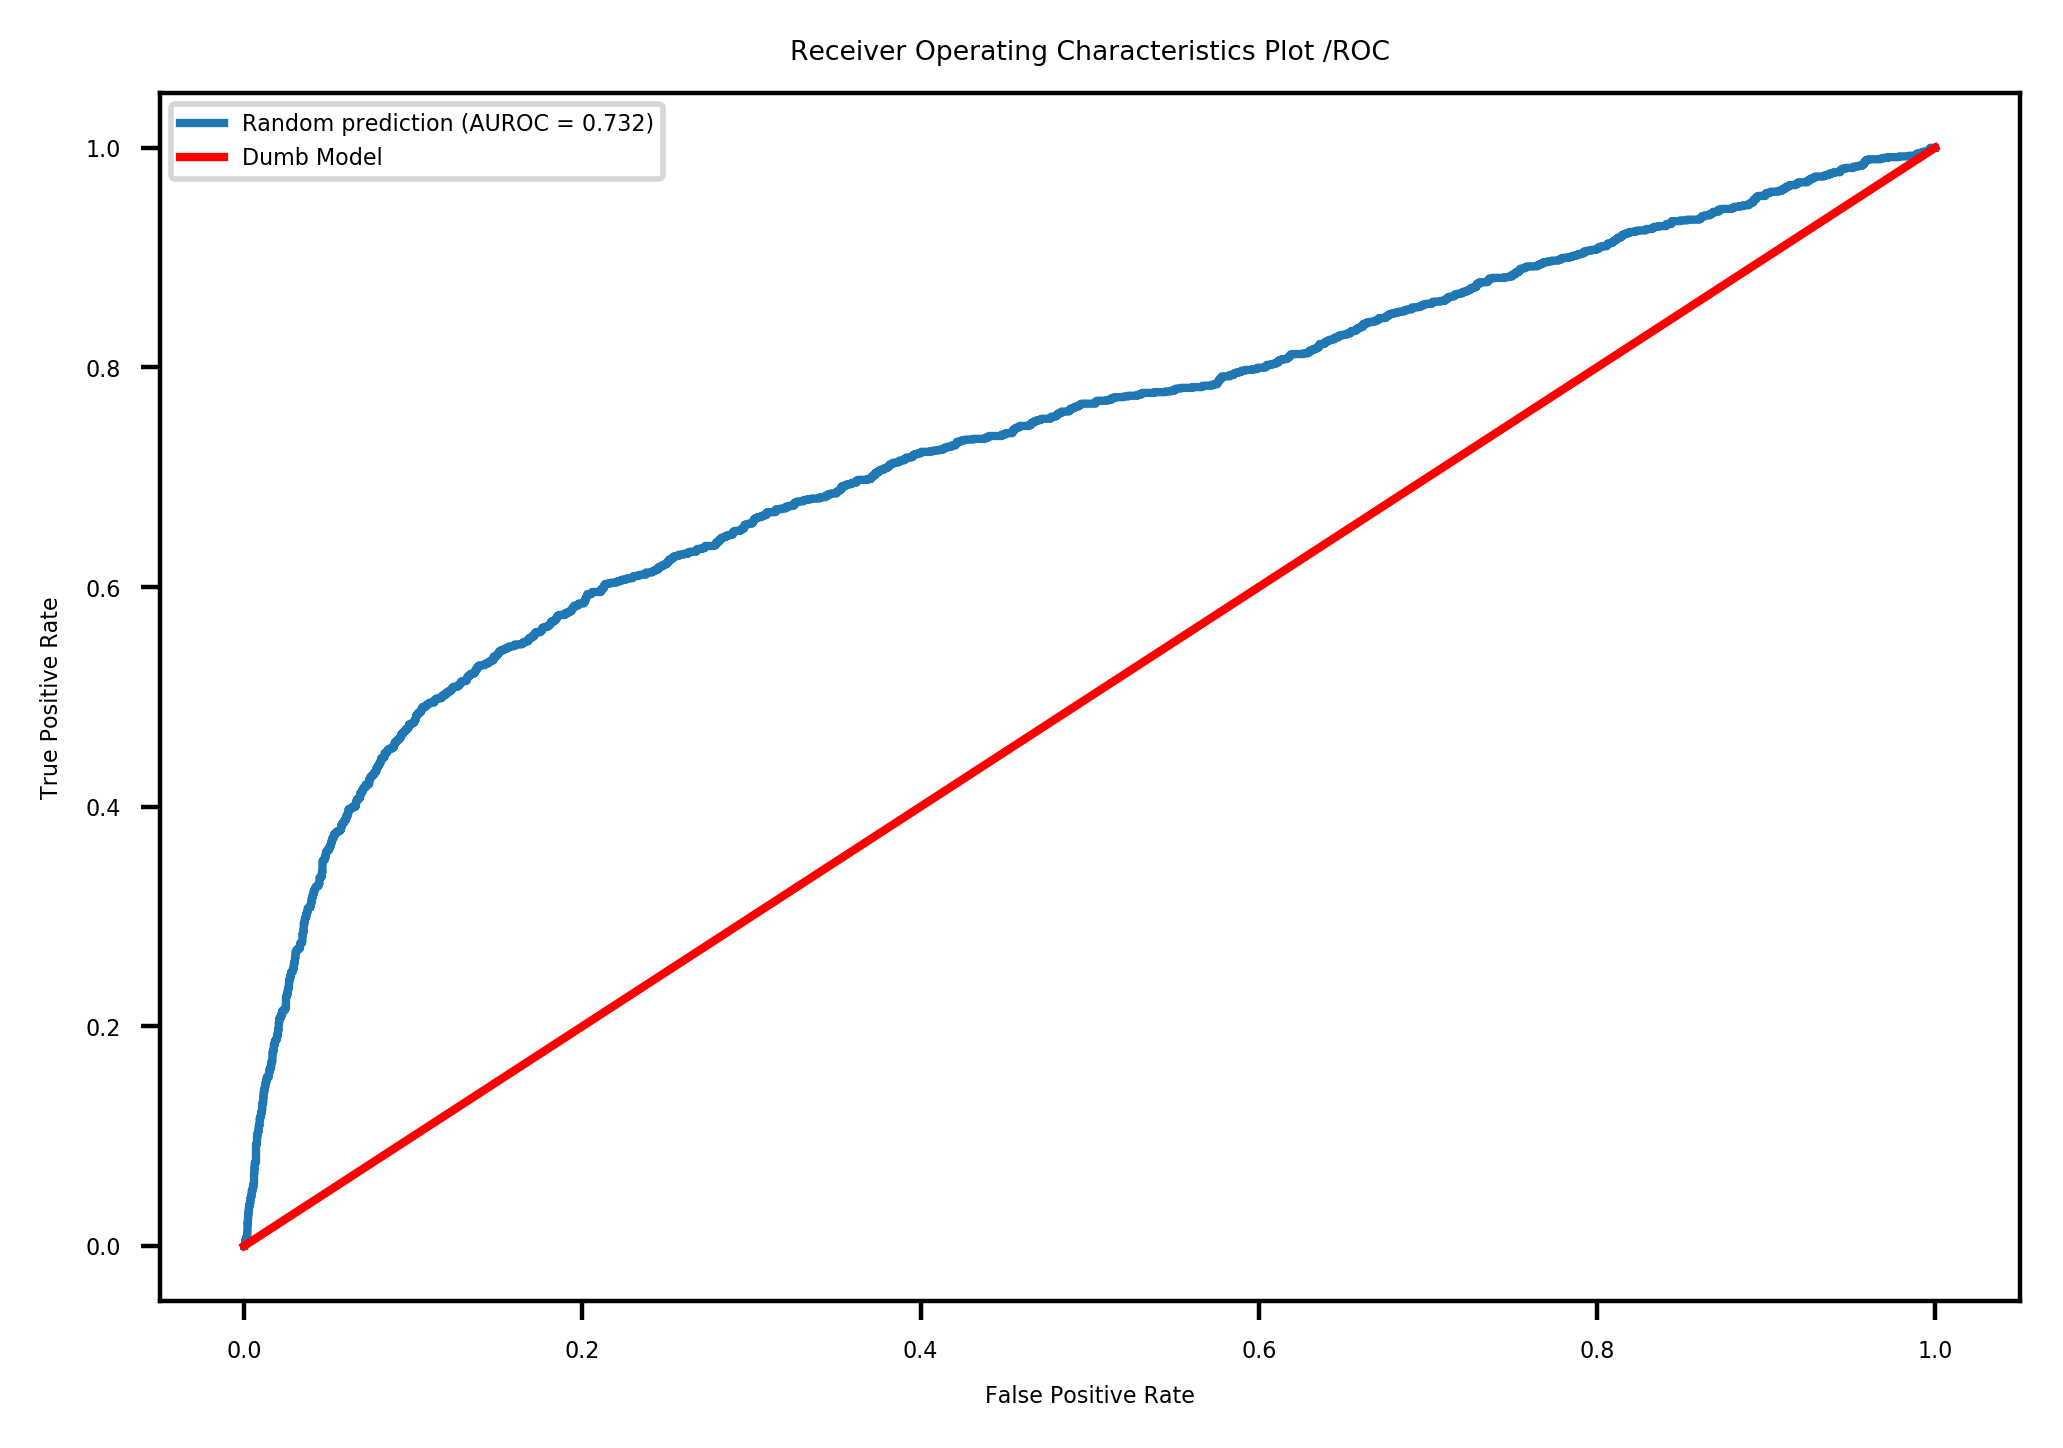

In [16]:
fpr, tpr, thresholds = roc_curve(Y_test,Y_pred[:,1])

plt.plot(fpr, tpr, label='Random prediction (AUROC = %0.3f)' % ruc_score)
plt.plot([0, 1], [0, 1], label='Dumb Model',color='red')

plt.title('Receiver Operating Characteristics Plot /ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 
plt.show()


_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [17]:
precision = average_precision_score(Y_test, Y_pred[:,1])
print('Average precision-recall score: ',precision)

Average precision-recall score:  0.5276623242945526


_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


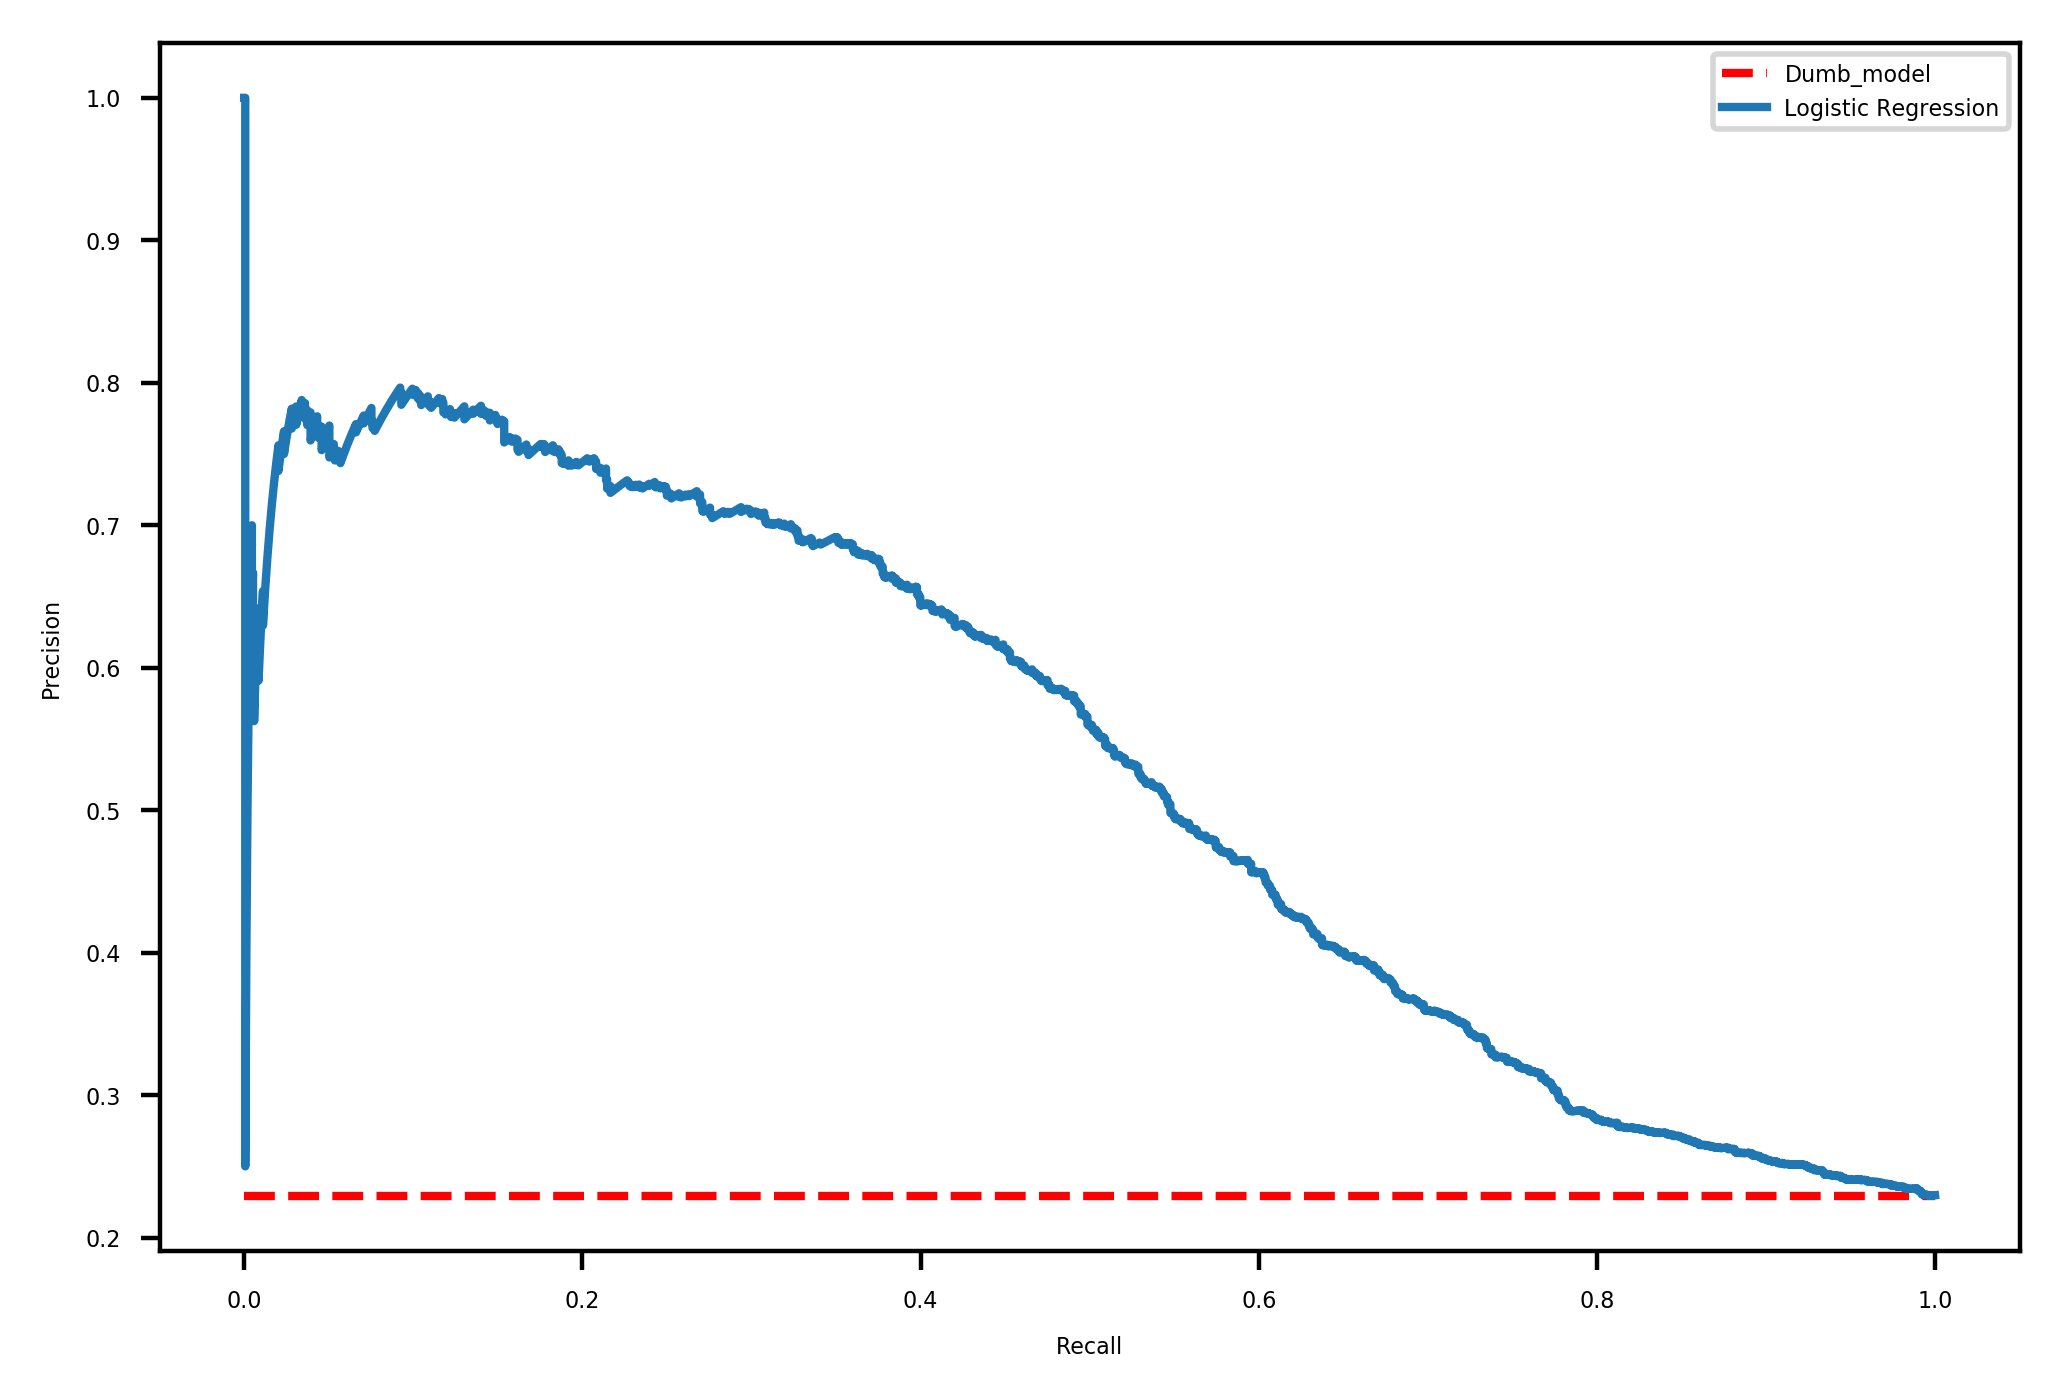

In [18]:
dumb_model = len(Y_test[Y_test==1]) / len(Y_test)
plt.plot([0, 1], [dumb_model, dumb_model], linestyle='--', label='Dumb_model',color='red')
precision, recall, _ = precision_recall_curve(Y_test, Y_pred[:,1])
plt.plot(recall, precision, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

    How is this different, conceptually and quantitatively, from your earlier calculation?
